## Read dataset

In [1]:
import pandas as pd

In [2]:
df_balance = pd.read_csv('../dataset/balance-scale.csv')

In [3]:
df_balance.head()  # Display the first few rows of the dataset

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [5]:
df_balance.describe()


,L-Weight,L-Distance,R-Weight,R-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [7]:
pd.unique(df_balance['Class'])


array(['B', 'R', 'L'], dtype=object)

In [8]:
df_balance['Class'].value_counts()

Class
R    288
L    288
B     49
Name: count, dtype: int64

## split Dependent(Target/Label) & independent(atribut) 

In [9]:
x = df_balance.drop(columns=['Class'])
y = df_balance['Class']

## Faeture Scaling 

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)


## Split Train & Test

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)


## Klasifikasi KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=21, metric='euclidean')
knn.fit(x_train, y_train)
knn


KNeighborsClassifier(metric='euclidean', n_neighbors=21)

## Prediksi / Testing

In [37]:
y_pred = knn.predict(x_test)

In [38]:
y_pred

array(['L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'R',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'L', 'L',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'L',
       'L', 'R', 'R', 'L', 'R', 'L', 'L', 'R'], dtype=object)

## Cek Akurasi & Evaluasi

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

print("Nilai Akurasi:", accuracy_score(y_test, y_pred))
print('=========================================================')
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))
print('=========================================================')
print("Matriks Kebingungan:\n", confusion_matrix(y_test, y_pred))

Nilai Akurasi: 0.952
Laporan Klasifikasi:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00         4
           L       0.96      0.99      0.97        70
           R       0.94      0.98      0.96        51

    accuracy                           0.95       125
   macro avg       0.63      0.66      0.64       125
weighted avg       0.92      0.95      0.94       125

Matriks Kebingungan:
 [[ 0  2  2]
 [ 0 69  1]
 [ 0  1 50]]


C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

<Axes: >

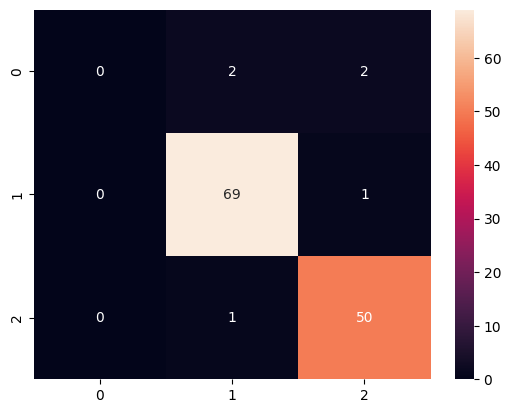

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## Mencari K yang terbaik

In [34]:
n_akurasi = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    n_akurasi.append(accuracy_score(y_test, y_pred))
print(n_akurasi)
    

[0.76, 0.76, 0.776, 0.792, 0.824, 0.848, 0.88, 0.88, 0.92, 0.92, 0.92, 0.904, 0.92, 0.936, 0.936, 0.928, 0.92, 0.928, 0.928, 0.936, 0.952, 0.936, 0.944, 0.936, 0.928, 0.928, 0.936, 0.936, 0.928]


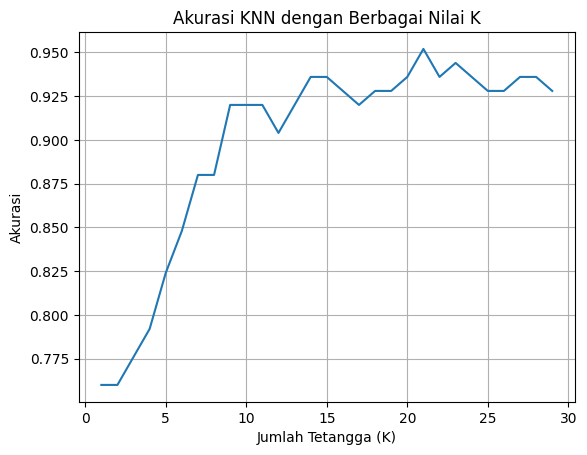

In [35]:
import matplotlib.pyplot as plt

plt.plot(range(1, 30), n_akurasi)
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.title('Akurasi KNN dengan Berbagai Nilai K')
plt.grid()
plt.show()

## Klasifikasi Data Baru

In [43]:
new_data = [[2,1,4,3]]
new_pred = knn.predict(new_data)
print("Prediksi Kelas untuk Data Baru:", new_pred)

Prediksi Kelas untuk Data Baru: ['R']
